<a href="https://colab.research.google.com/github/GDharan10/MachineLearningAlgorithmFromScratch/blob/main/Tree-Based%20Algorithms%20/%20DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview**

**Used for predicting both continuous and categorical values.**

Linear regression is a simple yet powerful algorithm used for predicting a continuous target variable based on one or more input features. It assumes a linear relationship between the input variables (features) and the output variable (target). The goal of linear regression is to find the best-fitting line that minimizes the difference between the predicted values and the actual values.




# **How It Works**

Linear regression works by finding the optimal values for the coefficients (weights) and bias that minimize the mean squared error between the predicted and actual values. The model can be represented as:

 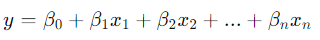

where
y is the predicted value, 𝛽0 is the bias term, 𝛽1, 𝛽2,...,𝛽𝑛 are the weights, and 𝑥1,𝑥2,...,𝑥𝑛 are the input features.

# **Background Python Code**
Below is the Python code for implementing linear regression from scratch.

In [ ]:
import numpy as np

class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr  # Learning rate
        self.n_iters = n_iters  # Number of iterations
        self.weights = None  # Weights initialization
        self.bias = None  # Bias initialization

    def fit(self, X, y):
        n_samples, n_features = X.shape  # Get number of samples and features
        self.weights = np.zeros(n_features)  # Initialize weights with zeros
        self.bias = 0  # Initialize bias with zero

        for _ in range(self.n_iters):  # Iterate over the number of iterations
            y_pred = np.dot(X, self.weights) + self.bias  # Compute predictions
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))  # Compute gradient for weights
            db = (1 / n_samples) * np.sum(y_pred - y)  # Compute gradient for bias

            self.weights -= self.lr * dw  # Update weights
            self.bias -= self.lr * db  # Update bias

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias  # Compute predictions
        return y_pred

# **Comparing the Algorithm with the Class**

**1. Initialization:**

* Algorithm: Initialize weights and bias to zero.
* Class (__init__ method):The weights and bias are initialized in the fit method after determining the number of features.

**2. Training:**

* Algorithm:
For each iteration, compute predictions, calculate gradients, and update weights and bias.
* Class (fit method):
 * **y_pred = np.dot(X, self.weights) + self.bias :** Computes the predicted values using the current weights and bias.
 * **dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) :** Calculates the gradient of the loss function with respect to the weights.
 * **db = (1 / n_samples) * np.sum(y_pred - y) :** Calculates the gradient of the loss function with respect to the bias.
 * **self.weights -= self.lr * dw :** Updates the weights using the gradients and learning rate.
 * **self.bias -= self.lr * db :** Updates the bias using the gradient and learning rate.

**3. Prediction:**

* Algorithm: Use the final weights and bias to make predictions.
* Class (predict method): Computes the predicted values using the final weights and bias.

**Summary**
* The __init__ method initializes the learning rate, number of iterations, and sets the weights and bias to None.
* The fit method trains the model by iterating over the data, computing predictions, calculating gradients, and updating the weights and bias.
* The predict method uses the trained weights and bias to make predictions on new data.
This step-by-step explanation should help in understanding how the LinearRegression class implements the linear regression algorithm.

# **Explanation of the fit method**
Let's perform a detailed explanation of the fit method for two iterations using an example.

## **Initial Setup**

Let's consider a simple example with 3 samples and 2 features:

In [ ]:
# Example data
X = np.array([[1, 2],
              [3, 4],
              [5, 6]])
y = np.array([7, 9, 11])

# Initial parameters
lr = 0.01
n_iters = 2
n_samples, n_features = X.shape
weights = np.zeros(n_features)
bias = 0

## **Iteration 1**

In [ ]:
# Compute Predictions (y_pred):
y_pred = np.dot(X, weights) + bias
y_pred

array([0., 0., 0.])

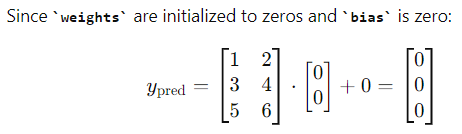

In [ ]:
# Compute Gradient for Weights (dw):
dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
dw

array([-29.66666667, -38.66666667])

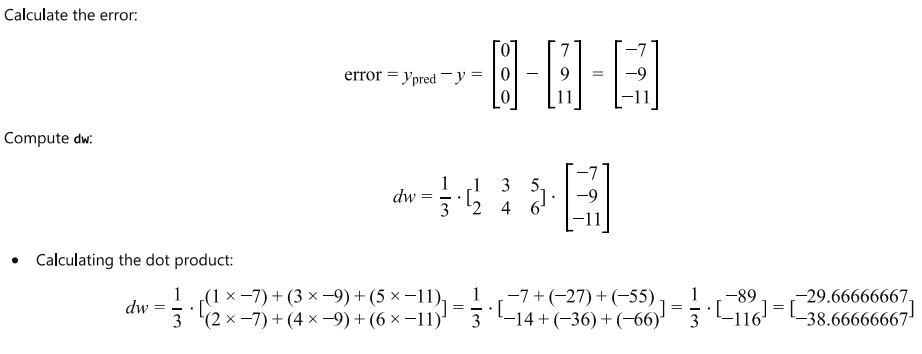

In [ ]:
# Compute Gradient for Bias (db):
db = (1 / n_samples) * np.sum(y_pred - y)
db

-9.0

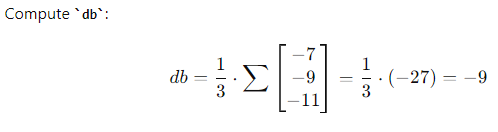

In [ ]:
# Update Weights:
weights -= lr * dw
weights

array([0.29666667, 0.38666667])

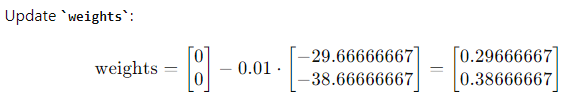

In [ ]:
# Update Bias:
bias -= lr * db
bias

0.09

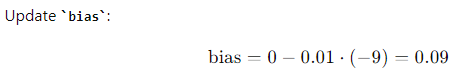

## **Iteration 2**

In [ ]:
# Compute Predictions (y_pred):
y_pred = np.dot(X, weights) + bias
y_pred

array([1.16      , 2.52666667, 3.89333333])

In [ ]:
# Compute Gradient for Weights (dw):
dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
dw

array([-20.26444444, -26.73777778])

In [ ]:
# Compute Gradient for Bias (db):
db = (1 / n_samples) * np.sum(y_pred - y)
db

-6.473333333333334

In [ ]:
# Update Weights:
weights -= lr * dw
weights

array([0.49931111, 0.65404444])

In [ ]:
# Update Bias:
bias -= lr * db
bias

0.15473333333333333

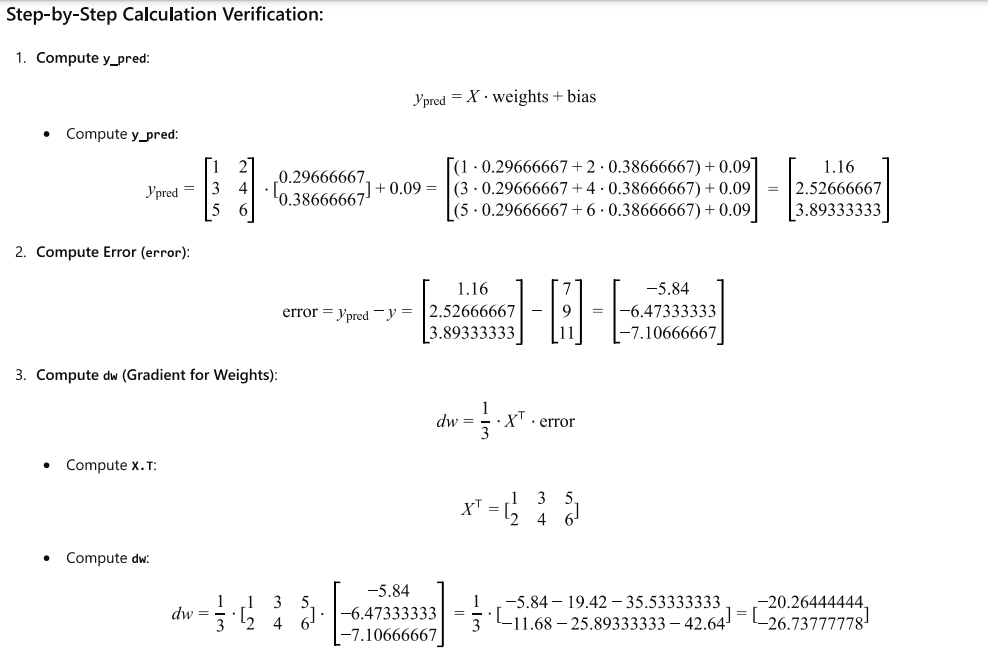
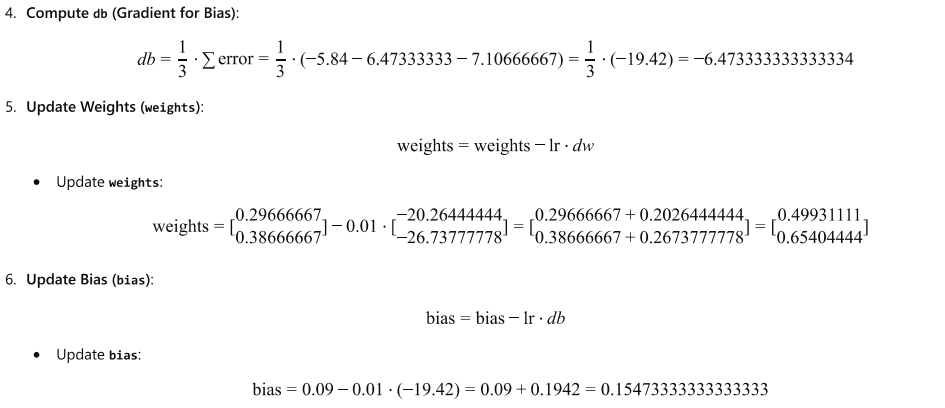

**Summary**

After two iterations, the weights and bias have been updated based on the gradients of the loss function with respect to each parameter. This process continues for the specified number of iterations (n_iters) to minimize the loss and improve the model's performance.

# **Implementation and Visualization**

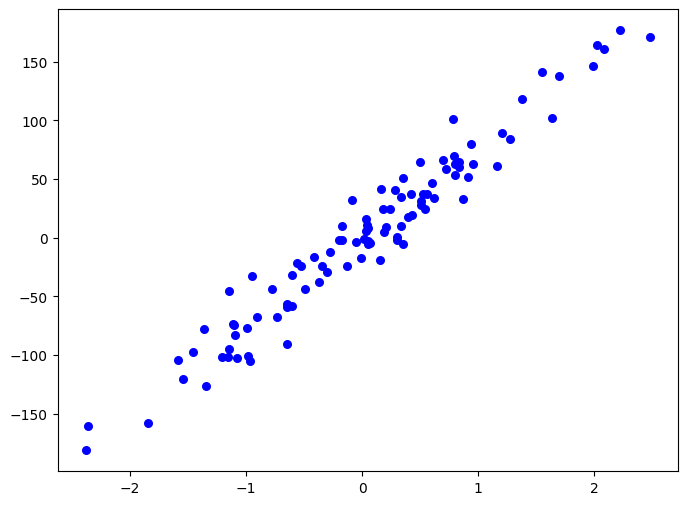

305.7719958301902


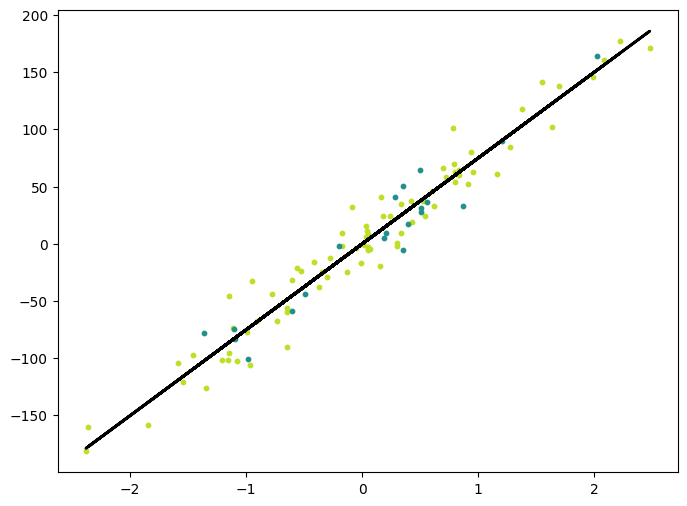

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

# Generate a synthetic regression dataset with 100 samples, 1 feature, and added noise
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Create a scatter plot of the dataset to visualize the relationship between X and y
fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y, color="b", marker="o", s=30)
plt.show()

# Initialize the LinearRegression model with a learning rate of 0.01
reg = LinearRegression(lr=0.01)

# Train the model using the training data
reg.fit(X_train, y_train)

# Make predictions on the test data
predictions = reg.predict(X_test)

# Define a function to calculate the Mean Squared Error (MSE)
def mse(y_test, predictions):
    return np.mean((y_test - predictions) ** 2)

# Calculate and print the MSE of the model on the test data
mse = mse(y_test, predictions)
print(mse)

# Predict values for the entire dataset to visualize the regression line
y_pred_line = reg.predict(X)

# Get a colormap for the plot
cmap = plt.get_cmap('viridis')

# Create a scatter plot to visualize the training and testing data along with the regression line
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)  # Training data points
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)    # Testing data points
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')  # Regression line
plt.show()

# **Implementation Details**

* **Learning Rate (lr):** The learning rate determines the step size for updating the weights during training. It controls how much the model parameters are adjusted in response to the estimated error each time the model weights are updated.
* **Number of Iterations (n_iters):** This parameter specifies how many times the algorithm will iterate over the training data. Each iteration involves updating the model's weights and bias based on the gradients computed from the training data to minimize the error or loss function.
* **Weights :** In linear regression, weights (or coefficients) represent the slope of the line that best fits the data. These weights are adjusted during training to achieve the best possible fit between the input features and the target variable.
* **Bias :** Bias (or intercept) is an additional parameter in linear regression that allows the model to make predictions even when all input features are zero. It accounts for any offset in the data and ensures the model fits the data points correctly.

# **Key Considerations for Linear Regression Modeling:**

* **Linearity Assumption:** Linear regression assumes a linear relationship between the independent variables (predictors) and the dependent variable (target). It's essential to verify this relationship through exploratory data analysis.

* **Feature Independence:** The independent variables should ideally be independent of each other to avoid multicollinearity, which can affect the model's performance and interpretation of coefficients.

* **Residual Analysis:** Checking the residuals (the differences between observed and predicted values) is crucial. Residuals should exhibit constant variance (homoscedasticity) and follow a normal distribution for the model to be valid.

* **Outlier Detection and Treatment:** Outliers can significantly impact regression models. Identifying and addressing outliers appropriately is important to ensure the model's robustness and accuracy.